In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("netflix_titles.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [29]:
df = df.loc[~df['date_added'].isnull()]
df = df.loc[~df['rating'].isnull()] 
df = df.loc[~df['duration'].isnull()]

In [30]:
df.fillna("NA", inplace=True)

print(df.shape)

(8790, 10)


In [51]:
df.head()

,show_id,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Target_audience
title,,,,,,,,,,,
Dick Johnson Is Dead,s1,Kirsten Johnson,No Cast Specified,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens
Blood & Water,s2,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature Audience
Ganglands,s3,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature Audience
Jailbirds New Orleans,s4,NA,No Cast Specified,NA,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature Audience
Kota Factory,s5,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature Audience


In [31]:
df.isnull().sum()

show_id         0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [27]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['release_year'] = df['release_year'].astype('str')

In [28]:
df.dtypes

show_id                 object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year            object
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [32]:
df.columns

Index(['show_id', 'director', 'cast', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [34]:
Distribution = df.groupby(['rating']).size().reset_index(name = 'counts')
fig = px.pie(Distribution, values='counts', names = 'rating', title = 'Distribution of Content Ratings on Netflix')

fig.show()

In [35]:
Distribution

,rating,counts
0,G,41
1,NC-17,3
2,NR,79
3,PG,287
4,PG-13,490
5,R,799
6,TV-14,2157
7,TV-G,220
8,TV-MA,3205
9,TV-PG,861


In [36]:
ratings_based_on_age = {
    'TV-PG': 'Parental Guidance',
    'TV-MA' : 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'TV-Y7': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature Audience',
    'TV-Y': 'General Audience',
    'NR': 'Mature Audience',
    'PG-13': 'Teens',
    'TV-G': 'General Audience',
    'PG': 'Teens',
    'G': 'General Audience',
    'UR': 'Mature Audience',
    'NC-17': 'Mature Audience'
}


df['Target_audience'] = df['rating'].replace(ratings_based_on_age)

df['Target_audience'].unique()

array(['Teens', 'Mature Audience', 'Parental Guidance',
       'General Audience'], dtype=object)

In [39]:
df.head(5)

,show_id,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Target_audience
title,,,,,,,,,,,
Dick Johnson Is Dead,s1,Kirsten Johnson,No Cast Specified,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens
Blood & Water,s2,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature Audience
Ganglands,s3,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature Audience
Jailbirds New Orleans,s4,NA,No Cast Specified,NA,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature Audience
Kota Factory,s5,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature Audience


<AxesSubplot:xlabel='Target_audience', ylabel='count'>

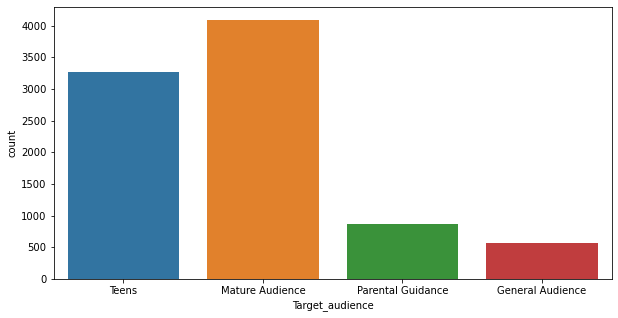

In [44]:
plt.figure(figsize = (10,5))

sns.countplot(x = "Target_audience", data = df)

In [50]:
df_country_max = df['country'].value_counts()[:10]

fig= px.bar(x = df_country_max.index, y = df_country_max.values, color = df_country_max.index, title = "Counties With Maximum Content on Netflix")

fig.show()


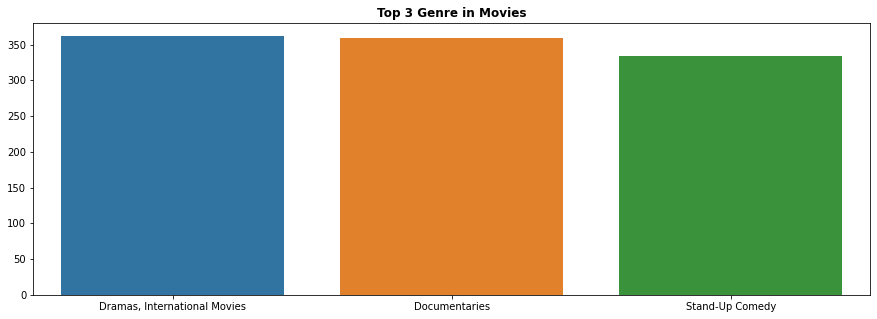

In [57]:
plt.figure(figsize = (15, 5))

sns.barplot(x = df["listed_in"].value_counts().head(3).index, y = df["listed_in"].value_counts().head(3).values)

plt.title("Top 3 Genre in Movies", fontweight = "bold")

plt.show()